# Matrix Factorization

In [34]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

df_courses = pd.read_csv("Coursera.csv")

In [36]:
column_names = ['UserID', 'CourseID', 'Rating', 'Timestamp']
df_ratings = pd.read_csv("rating_coursera_final.csv")
df_ratings

,userID,number_course_ID,course_id,rating
0,200023,250,google-cbrs-cpi-training,4
1,79956,250,google-cbrs-cpi-training,4
2,101446,250,google-cbrs-cpi-training,4
3,53579,250,google-cbrs-cpi-training,4
4,215308,250,google-cbrs-cpi-training,4
...,...,...,...,...
1454706,39261,84,computer-networking,5
1454707,244382,84,computer-networking,5
1454708,64042,84,computer-networking,5
1454709,73108,84,computer-networking,5


In [37]:
df_sorted = df_ratings.sort_values(by='number_course_ID', ascending=False)
df_sorted.head(100)

,userID,number_course_ID,course_id,rating
1096441,88280,603,writing-for-business,5
1095384,169886,603,writing-for-business,5
1095368,162028,603,writing-for-business,5
1095369,196237,603,writing-for-business,5
1095370,29233,603,writing-for-business,5
...,...,...,...,...
1095277,19812,603,writing-for-business,5
1095278,81820,603,writing-for-business,5
1095279,132169,603,writing-for-business,5
1095280,182766,603,writing-for-business,5


In [38]:
df_coursera_courses= pd.read_csv("Coursera_courses.csv")

In [39]:
df_ratings.course_id.value_counts() # top 5 & last 5 courses in terms of number of reviews. 

course_id
python                                        45218
machine-learning                              35895
neural-networks-deep-learning                 35750
technical-support-fundamentals                35319
python-data                                   33546
                                              ...  
social-economic-networks                          6
intro-to-healthcare                               6
entrepreneurship-strategy                         6
epigenetics                                       6
building-modern-python-applications-on-aws        3
Name: count, Length: 604, dtype: int64

## SVD

In [6]:
from scipy.sparse.linalg import svds
import pickle

In [10]:
# Assuming df_ratings is your DataFrame with columns: UserID, CourseID, Rating, Timestamp
# You can preprocess the data to create a user-item matrix
user_item_matrix = df_ratings.pivot_table(values='rating', index='userID', columns='number_course_ID').fillna(0)
user_item_matrix.to_pickle('user_item_matrix.pkl')
user_item_matrix

number_course_ID,0,1,2,3,4,5,6,7,8,9,...,594,595,596,597,598,599,600,601,602,603
userID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Function for Singular Value Decomposition (SVD)
def matrix_factorization_svd(R, k):
    U, sigma, Vt = np.linalg.svd(R, full_matrices=False)
    sigma_matrix = np.diag(sigma[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    R_approx = np.dot(np.dot(U_k, sigma_matrix), Vt_k)
    return R_approx

### Find the MSE for different values of k

In [13]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Assume user_item_matrix and matrix_factorization_svd are defined as in your code
# Convert the user-item matrix to a NumPy array
R_svd = user_item_matrix.values
# Get the shape of the user-item matrix
m_svd, n_svd = R_svd.shape

# Create a list of values for k that you want to evaluate
k_values = [5, 10, 30, 50, 70, 90, 100]

# Dictionary to store MSE values for each k
mse_values = {}

# Iterate over different values of k
for k in tqdm(k_values, desc='Processing k values'):
    # Perform matrix factorization with SVD
    R_approx_svd = matrix_factorization_svd(R_svd, k)
    
    # Extract the observed values (non-zero entries) from the original matrix
    observed_values = R_svd[R_svd != 0]
    
    # Extract the corresponding approximated values from the factorized matrix
    predicted_values = R_approx_svd[R_svd != 0]
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(observed_values, predicted_values)
    
    # Store the MSE value for the current k
    mse_values[k] = mse

# Print the MSE values for each k
for k, mse in mse_values.items():
    print(f'MSE for k={k}: {mse}')

Processing k values: 100%|██████████████████████████████████████████████████████████████████████████| 7/7 [03:28<00:00, 29.84s/it]

MSE for k=5: 18.667744856072822
MSE for k=10: 17.02295289540812
MSE for k=30: 13.290215524805499
MSE for k=50: 11.213085711674267
MSE for k=70: 9.606706043819685
MSE for k=90: 8.366769790706718
MSE for k=100: 7.831588201394494


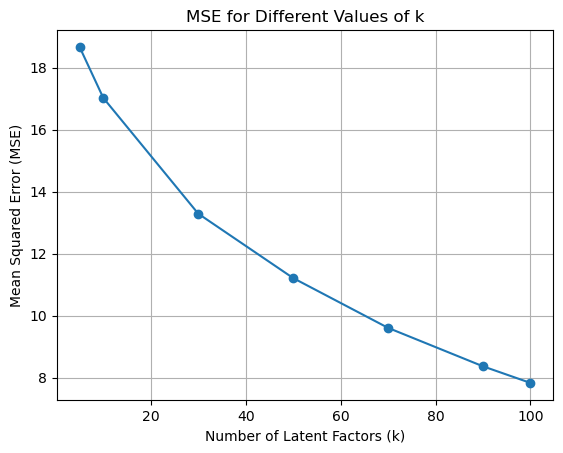

In [14]:
import matplotlib.pyplot as plt

# Extract k values and corresponding MSE values from the dictionary
k_values = list(mse_values.keys())
mse_list = list(mse_values.values())

# Create a plot
plt.plot(k_values, mse_list, marker='o')
plt.title('MSE for Different Values of k')
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

### For k = 100

In [16]:
# Convert the user-item matrix to a NumPy array
R_svd = user_item_matrix.values
# Get the shape of the user-item matrix
m_svd, n_svd = R_svd.shape

# Set the number of latent factors for matrix factorization
k = 100

In [17]:
# Apply SGD
R_approx_svd = matrix_factorization_svd(R_svd, k)
# Assuming R_approx_svd is your NumPy array obtained from matrix factorization
np.save('R_approx_svd.npy', R_approx_svd)

#### Recommend courses for a random user index

In [18]:
random_user_index = np.random.randint(0, m_svd)
random_user_index

28747

In [19]:
user_ratings = R_approx_svd[random_user_index, :]
sorted_course_indices = np.argsort(user_ratings)[::-1]

In [20]:
# Get the top 10 recommended courses
top_10_courses = sorted_course_indices[:10]
top_10_courses

array([449, 360, 595,  84, 223, 122, 347, 187, 225, 127], dtype=int64)

In [21]:
# Extract corresponding course_ids
recommended_course_ids = user_item_matrix.columns[top_10_courses]

# Print the course_ids
print(f"Recommended courses for User {random_user_index}: {recommended_course_ids}")

Recommended courses for User 28747: Index([449, 360, 595, 84, 223, 122, 347, 187, 225, 127], dtype='int64', name='number_course_ID')


In [22]:
# Print corresponding course_ids from df_ratings
corresponding_course_ids = df_ratings.loc[df_ratings['number_course_ID'].isin(recommended_course_ids), 'course_id'].unique()
print(f"Corresponding course_ids: {corresponding_course_ids.tolist()}")


Corresponding course_ids: ['computer-networking', 'what-is-datascience', 'excel-essentials', 'gcp-fundamentals', 'python-data', 'deep-neural-network', 'machine-learning-projects', 'data-scientists-tools', 'gcp-big-data-ml-fundamentals', 'matlab']


In [25]:
# Filter df_coursera_courses based on corresponding_course_ids
corresponding_courses_info = df_coursera_courses[df_coursera_courses['course_id'].isin(corresponding_course_ids)]

# Print the correspond to course_id, "Course Name" for each course
print("Corresponding courses:")
print(corresponding_courses_info['Course Name'])

Corresponding courses:
8              The Bits and Bytes of Computer Networking
13                                 What is Data Science?
21                 Excel Skills for Business: Essentials
25     Google Cloud Platform Fundamentals: Core Infra...
27                                Python Data Structures
33     Improving Deep Neural Networks: Hyperparameter...
71                 Structuring Machine Learning Projects
75                          The Data Scientist’s Toolbox
113    Google Cloud Platform Big Data and Machine Lea...
206              Introduction to Programming with MATLAB
Name: Course Name, dtype: object


## NMF

In [40]:
from sklearn.decomposition import NMF
import numpy as np
import pandas as pd

# Assuming df_ratings is your DataFrame with columns: UserID, CourseID, Rating, Timestamp
# You can preprocess the data to create a user-item matrix
user_item_matrix = df_ratings.pivot_table(values='rating', index='userID', columns='number_course_ID').fillna(0)

# Convert the user-item matrix to a NumPy array
R_sgd = user_item_matrix.values

# Set the number of latent factors for matrix factorization
k = 100

In [ ]:
# Create an NMF (Non-Negative Matrix Factorization) model using SGD
# using of sklearn.decomposition NMF
model = NMF(n_components=k, init='random', random_state=42)

# Fit the model to your data
W = model.fit_transform(R_sgd)
H = model.components_

In [ ]:
# Reconstruct the original matrix
R_approx_sgd = np.dot(W, H)
np.save('R_approx_sgd.npy', R_approx_sgd)
# Recommend courses for a random user index


#### Recommend courses for a random user index

In [ ]:
random_user_index = np.random.randint(0, R_sgd.shape[0])
random_user_index

In [ ]:
user_ratings = R_approx_sgd[random_user_index, :]
sorted_course_indices = np.argsort(user_ratings)[::-1]

In [ ]:
# Get the top 10 recommended courses
top_10_courses = sorted_course_indices[:20]

In [ ]:
# Extract corresponding course_ids
recommended_course_ids = user_item_matrix.columns[top_10_courses]

# Print the course_ids
print(f"Recommended courses for User {random_user_index}: {recommended_course_ids}")

In [ ]:
# Print corresponding course_ids from df_ratings
corresponding_course_ids = df_ratings.loc[df_ratings['number_course_ID'].isin(recommended_course_ids), 'course_id'].unique()
print(f"Corresponding course_ids: {corresponding_course_ids.tolist()}")


In [ ]:
# Filter df_coursera_courses based on corresponding_course_ids
corresponding_courses_info = df_coursera_courses[df_coursera_courses['course_id'].isin(corresponding_course_ids)]

# Print the correspond to course_id, "Course Name" for each course
print("Corresponding courses:")
print(corresponding_courses_info['Course Name'])